# Hydrological Time Series and Flux Calculations
***
There is an interesting observation we should all keep in mind when we calculate cumulative values in time series.  In hydrology, we often calculate water and nutrient fluxes. We inherit files of data with two columns: one with the dates, one with the 'flow data'.  It may be very tempting to just add the values together (like one does with precipitation data) and multiply that sum by the time resolution and voilà... no big deal!  However, it is not that simple and in most cases this simple reasoning may actually be false...! Really? How can that be???  The answer: one must keep a close eye on what 'flow data' exactly one is dealing with.  

### Precipitation data is always reported as cumulative values over a time interval
Because this is the easy way to measure rainfall, precipitation data is always reported as the cumulative precipitation over a given period, and the time stamp associated with each value corresponds to the end of the interval.  In other words, if you inherit an *hourly precipitation* file where on a file row the time stamp is 2010-10-15 01:00 and the precipitation value is 5 mm, it means that it rained a *cumulative* rainfall depth of 5 mm *between* 2010-10-15 00:00 and 2010-10-15 01:00.  
So to calculate the total precipitation over a given period, one only needs to add all the values reported in a particular file.  Simple.  The dimension of precipitation data are $[L]$, or length, i.e., the depth of rain over a given area.  In reality, it really corresponds to a volume of water $[L^3]$, or volume, that fell over a given land area. But this is beside the point.

### Flow volumes
Contrary to precipitation data, the easiest way to measure flow is not by measuring flow volumes, but to measure (actually calculate from measured stage and/or velocity) *flow rates*, which dimensions are $[L^3.T^{-1}]$ or volume per time.  This is the reason why flow data are almost always reported as flow rates.  So adding flow rate values from a file will not yield volumes, but a number in the same $[L^3.T^{-1}]$ dimension.  One must then multiply by the time interval between each flow values reported to calculate the volume because $[L^3.T^{-1}].[T]$ yields $[L^3]$.  HOWEVER, and this is where it can be quite confusing, it turns out that flow rates values can be reported in two ways and correspond to two different types of values...!  
***
## Instantaneous vs. mean discharge over an interval
There are two ways to report discharge data: for a given time stamp, the discharge value may correspond to either:
* the *instantaneous* discharge value OR
* the *mean discharge* over the time resolution interval prior to the time stamp 

So why did hydrologists complicate things this much, really...?  There are some good reasons for this.  But does it matter?
For big rivers which flow rates do not vary very rapidly, it is not rare to have daily flow values reported.  This means that for a given flow value, there is no time of the day associated with the time stamp, just the date.  This is often a good hint that the values correspond to *mean daily discharges* (see below on how they are calculated). Still, if instruments can meaure stage or velocity at a given instant, why not report these instead?  

Actually, in hydrology, absolutely instantaneous meaurements essentially do not exist *stricto sensu*. First, this is because every sensor needs a little bit of time to make its meaurements, might it be several milliseconds.  Second, in many cases it is advantageous to measure over a given (often short period like 30 sec) stage or velocity many times and average measurements over these 30 sec, and consider that the 30-sec average does correspond to the 'instantaneous' value for the discharge.  Indeed, because of waves, turbulence, instrument instabilities, etc. there can be a bit of noise in the meaurements, and it might be advantageous to average them. In most streams and rivers, flow does not change quickly enough to make a significant difference over e.g., 30 sec.  

However, some instruments do offer the possibility to report for a given time stamp the average of *n* measurements regularly spaced over a time interval and assign the time stamp corresponding to the end of that interval.  The same instruments could also report the measurement they can make in a split second, i.e., almost instantaneously.  So with the same instrument and for a given time stamp (and in this case there would be a time of day, so there would be no hint that the values would correspond to interval means) the 'flow rates' reported could correspond to in fact rather different values...  So theoretically one should know exactly on what setting the instrument was set on.  

But does it really matter? We shall see below, that indeed, there is space for errors when calculating cumulative flow depending on what data we are dealing with.  
***

### Instantaneous discharge
To better understand this subtlety, it might be just as easy to illustrate this using some actual data.  In the example below, each open black dot represents *instantaneous* discharges computed every 10 min, and expressed in L/s. 


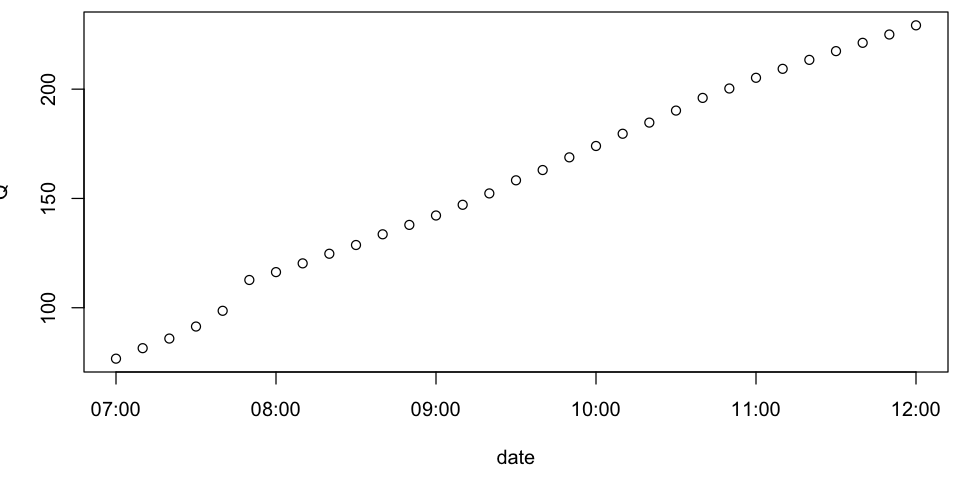

In [303]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)
par(mar=c(4.5,3.5,0.5,0.5))
date<-as.POSIXlt(c("1999-01-18 07:00:00","1999-01-18 07:10:00","1999-01-18 07:20:00","1999-01-18 07:30:00",
                   "1999-01-18 07:40:00","1999-01-18 07:50:00","1999-01-18 08:00:00","1999-01-18 08:10:00",
                   "1999-01-18 08:20:00","1999-01-18 08:30:00","1999-01-18 08:40:00","1999-01-18 08:50:00",
                   "1999-01-18 09:00:00","1999-01-18 09:10:00","1999-01-18 09:20:00","1999-01-18 09:30:00",
                   "1999-01-18 09:40:00","1999-01-18 09:50:00","1999-01-18 10:00:00","1999-01-18 10:10:00",
                   "1999-01-18 10:20:00","1999-01-18 10:30:00","1999-01-18 10:40:00","1999-01-18 10:50:00",
                   "1999-01-18 11:00:00","1999-01-18 11:10:00","1999-01-18 11:20:00","1999-01-18 11:30:00",
                   "1999-01-18 11:40:00","1999-01-18 11:50:00","1999-01-18 12:00:00"))
Q<-c(76.7,81.5,85.9,91.4,98.6,112.7,116.3,120.3,124.7,128.7,133.6,137.9,142.2,147.1,152.3,158.3,163.0,
     168.8,174.0,179.6,184.7,190.2,196.0,200.3,205.2,209.3,213.4,217.4,221.2,225.0,229.2)
xlim=as.POSIXct(c(min(date),max(date)));ylim=c(min(Q),max(Q))
plot(date,Q,xlim=xlim,ylim=ylim)

### Mean discharge over an interval

Now, if we want to represent the "same" data but expressed as hourly *mean discharge*, the figure below is what it would really corresponds to, the red square showing the value that is effectively stored for the corresponding time stamp, and the red segment illustrate that the mean is calculated over 6 values spanning over an hour.  
There are several things to notice:
* there is no red square for the 07:00 time stamp
* the segments have purposely been represented to visually span over the 6 values that are used to calculate the mean discharge over an hour. This means that the value at the top of the previous hour is not used to calculate the mean. This has some (small) consequences on the cumulative flow computations later on.  
* notice that for all time stamps on the top of the hour, the red square values are much lower than the instantaneous values at the same time.  This is expected as in this case, the flow values are increasing.  The opposite would be true, if the flow values were decreasing.

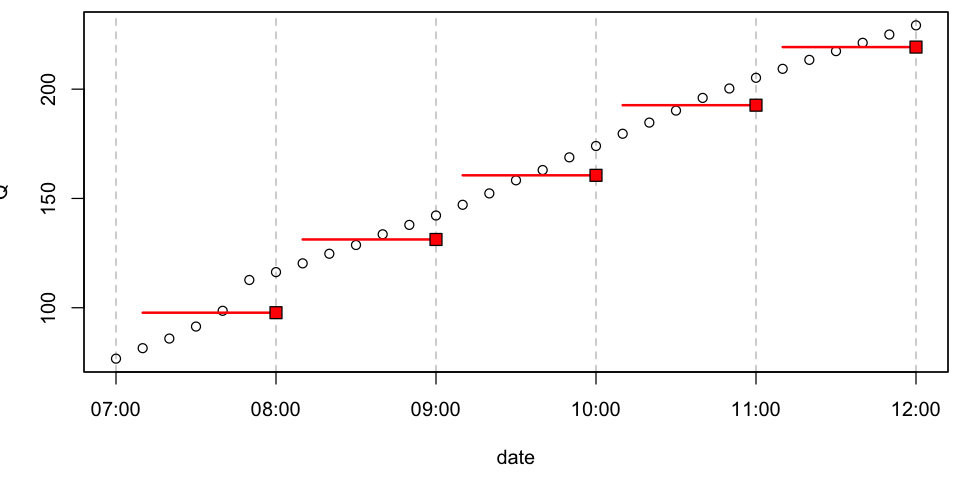

In [304]:
Qh<-as.matrix(Q[-1])
dim(Qh)=c(6,5)
mQh<-apply(Qh,2,mean)
dateh<-date[date$min==0]
date10<-date[date$min==10]
dateh<-as.POSIXct(dateh);date10<-as.POSIXct(date10);par(mar=c(4.5,3.5,0.5,0.5))
plot(date,Q,xlim=xlim,ylim=ylim, panel.first = c(abline(v=dateh, lty=2 ,col = 'grey')))
for (i in 1:7){segments(date10[i],mQh[i],dateh[i+1],mQh[i],col = "red",lwd = 2)}
par(new=TRUE)
plot(dateh[-1],mQh,pch=22,bg="red",cex=1.5,
    xlim=xlim,ylim=ylim,
    xaxt="n",yaxt="n",xlab="",ylab="")

## Calculating cumulative volume
### First: using instantaneous flow

To calculate the cumulative volume from 07:00 to 12:00, let us start from the instantaneous data (open black circle). The proper way of doing this is to integrate the area under the trapeze defined by the consecutive dates as vertical boundaries, Q=0 for the lower horizontal boundary, and the the Q values for the upper side of the trapeze, as represented by the polygons in the left side of the graph below.  
The cumulative flow (expressed in m³) is plotted on the right side of the figure.  Notice that for time stamp 07:00, there is a value and it is 0.  

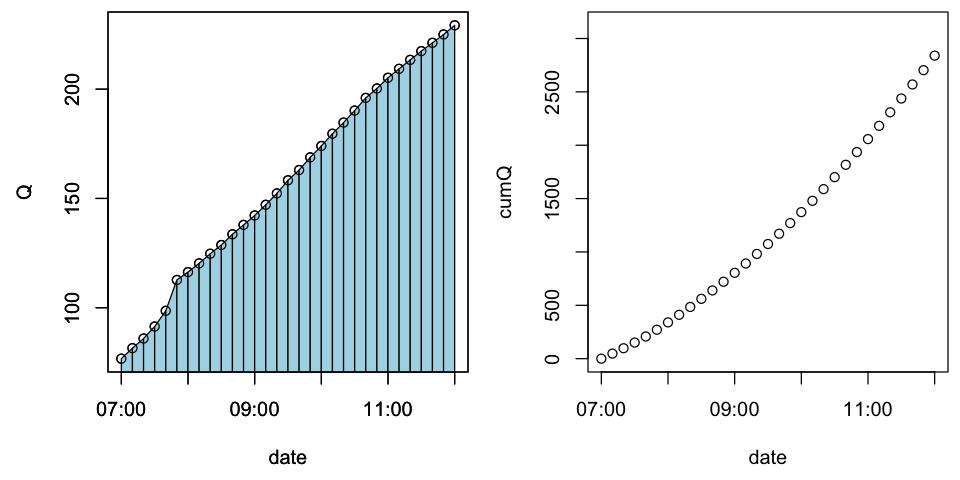

In [305]:
par(mfrow = c(1,2));par(mar=c(4.5,4.5,0.5,0.5))                      # this to split the plot layout into two columns
plot(date,Q,xlim=xlim,ylim=ylim)
date<-as.character(date)                 # need to transfer dates back into character to make some operations
polygx<-cbind(head(date,-1),head(date,-1),date[-1],date[-1],head(date,-1))                 # x values of the polygons
polygy<-cbind(rep(0,length(Q)-1),head(Q,-1),Q[-1],rep(0,length(Q)-1),rep(0,length(Q)-1))   # y values of the polygons
for (j in 1:(length(Q)-1)){polygon(as.POSIXct(as.vector(polygx[j,])),as.vector(polygy[j,]),col="lightblue")}
date<-as.POSIXct(date)
par(new=TRUE)
plot(date,Q,xlim=xlim,ylim=ylim)         # plot the original data back on top

########## this part calculates the cumulative flow by integration of the area under the hydrograph
timeres<-600                             # time resolution in seconds
cumQ<-matrix(0,length(Q),1)
for (i in 1:(length(Q)-1)){QQ=(Q[i]+Q[i+1])/2*timeres;cumQ[i+1]=cumQ[i]+QQ}
cumQ<-cumQ/1000
ylim2=c(0,1.1*max(cumQ))
plot(date,cumQ,xlim=xlim,ylim=ylim2) 

### Second: using mean value over an interval

If we take the 'same' data expressed as *hourly mean discharge*, and we calculate the cumulative flow, this corresponds to integrating rectangles like in the left panel of the figure below.  The cumulative values are plotted at red squares on the cumulative flow plot on the right panel of the figure below.

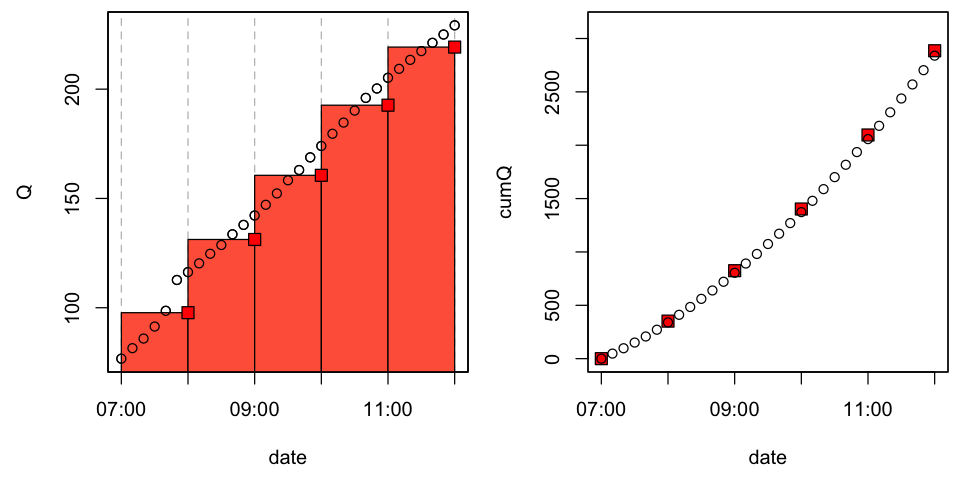

In [306]:
par(mfrow = c(1,2));par(mar=c(4.5,4.5,0.5,0.5))
plot(date,Q,xlim=xlim,ylim=ylim, panel.first = c(abline(v=dateh, lty=2 ,col = 'grey')))
dateh<-as.character(dateh)
rectxy<-cbind(head(dateh,-1),rep(0,length(mQh)),dateh[-1],mQh)
for (i in 1:length(mQh)){rect(as.POSIXct(rectxy[i,1]),rectxy[i,2],as.POSIXct(rectxy[i,3]),rectxy[i,4],col = "tomato")} 
par(new=TRUE)
plot(date,Q,xlim=xlim,ylim=ylim,xaxt="n",yaxt="n",xlab="",ylab="")
par(new=TRUE);dateh<-as.POSIXct(dateh)
plot(dateh[-1],mQh,pch=22,bg="red",cex=1.5,
    xlim=xlim,ylim=ylim,
    xaxt="n",yaxt="n",xlab="",ylab="")

########## this part calculates the cumulative flow by integration of the rectangle area under the hydrograph
cumQh<-c(0,cumsum(mQh)*timeres*6/1000)
plot(dateh,cumQh,xlim=xlim,ylim=ylim2,xaxt="n",yaxt="n",xlab="",ylab="",pch=22,bg="red",cex=1.5)
par(new=TRUE)
plot(date,cumQ,xlim=xlim,ylim=ylim2)

Now, if you look really closely, you will see that the open circle are not quite in the middle of the squares, and this is not a mistake.  The cumulative flow calculated as the mean discharge over a given period does not yield exactly what the integration of trapezes drawn from the instantaneous discharge!  

In fact you can see in the table below the dicharges in $(m^3)$ and the percentage difference at each time stamp:

|   time stamp       | using Instantaneous Q |using mean Q | % difference |
|:-------------------|-------:|-------:|------:|
|1999-01-18 07:00:00 |0       |0       |NaN %  |
|1999-01-18 08:00:00 |339.96  |351.84  |3.38 % |
|1999-01-18 09:00:00 |804.63  |824.28  |2.38 % |
|1999-01-18 10:00:00 |1373.19 |1402.38 |2.08 % |
|1999-01-18 11:00:00 |2057.43 |2095.98 |1.84 % |
|1999-01-18 12:00:00 |2839.53 |2885.28 |1.59 % |

***
How can this be since the original data is exactly the same?  It is because when averaging we are actually extrapolating the flow values. In the left panel of the figure below, we have represented the cumulated flow volume over one hour between the 09:00 and 10:00 time stamps with the red rectangle area, as calculated using the *mean discharge* computed as before.  We have represented the same volume by the 6 small rectangles that represent what really happens when we average 6 instantaneous values into one mean one, and multiply by the 1-hr time resolution to obtain the flow volume within that hour.  Notice that we are essentially extrapolating *values* to the left, and thus there is a little bit extra surface area compared to the trapezes one can draw between consecutive instantaneous flow measurements (right panel of the figure below).  



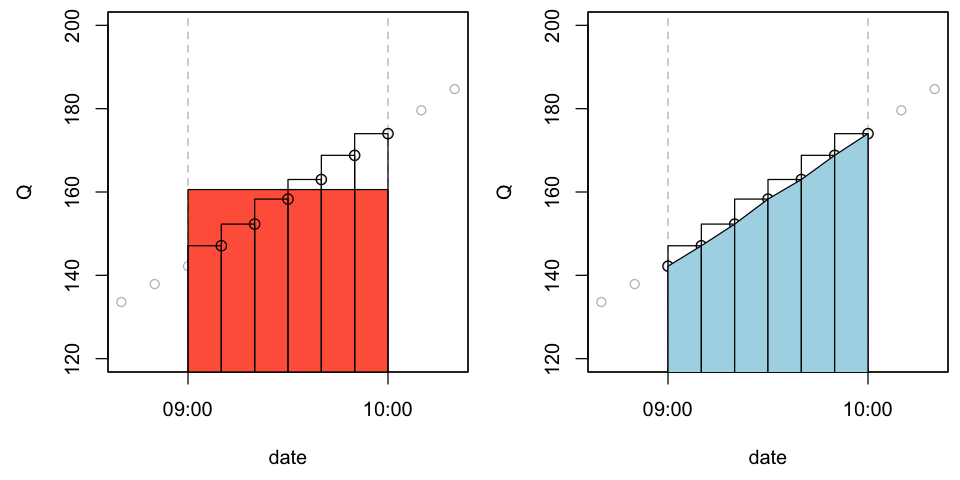

In [307]:
par(mfrow = c(1,2));par(mar=c(4.5,4.5,0.5,0.5))
date<-as.POSIXct(date)
dateh<-as.POSIXct(dateh)
subdate=date[date>=as.POSIXct("1999-01-18 09:00:00") & date<=as.POSIXct("1999-01-18 10:00:00") ]
subQ=subset(Q,date>=as.POSIXct("1999-01-18 09:00:00") & date<=as.POSIXct("1999-01-18 10:00:00") )
xlimzoom=as.POSIXct(c(min(date)+(max(date)-min(date))/3,min(date)+2*(max(date)-min(date))/3))
ylimzoom=c(120,200)
plot(date,Q,xlim=xlimzoom,ylim=ylimzoom, panel.first = c(abline(v=dateh, lty=2 ,col = 'grey')),col="grey")
rect(as.POSIXct(rectxy[3,1]),rectxy[3,2],as.POSIXct(rectxy[3,3]),rectxy[3,4],col = "tomato")
par(new=TRUE)
plot(subdate[-1],subQ[-1],xlim=xlimzoom,ylim=ylimzoom,cex=1.15,xaxt="n",yaxt="n",xlab="",ylab="")
subdate=as.character(subdate)
subrectxy=cbind(head(subdate,-1),rep(0,(length(subQ)-1)),subdate[-1],subQ[-1])
for (i in 1:(length(subQ)-1)){
    rect(as.POSIXct(subrectxy[i,1]),subrectxy[i,2],as.POSIXct(subrectxy[i,3]),subrectxy[i,4],col = "transparent")} 
######## right panel
plot(date,Q,xlim=xlimzoom,ylim=ylimzoom, panel.first = c(abline(v=dateh, lty=2 ,col = 'grey')),col="grey")
for (i in 1:(length(subQ)-1)){
    rect(as.POSIXct(subrectxy[i,1]),subrectxy[i,2],as.POSIXct(subrectxy[i,3]),subrectxy[i,4],col = "transparent")}
par(new = TRUE)
subdate<-as.POSIXct(subdate)
plot(subdate,subQ,xlim=xlimzoom,ylim=ylimzoom,cex=1.15,xaxt="n",yaxt="n",xlab="",ylab="")
subdate<-as.character(subdate)
polygx<-cbind(head(subdate,-1),head(subdate,-1),subdate[-1],subdate[-1],head(subdate,-1))
polygy<-cbind(rep(0,length(subQ)-1),head(subQ,-1),subQ[-1],rep(0,length(subQ)-1),rep(0,length(subQ)-1))
for (j in 1:(length(subQ)-1)){polygon(as.POSIXct(as.vector(polygx[j,])),as.vector(polygy[j,]),col="lightblue")}


Although we are supposed to represent, over the one hour interval, the *average* or *mean* discharge, we are really using 6 out of the 7 values that would need to have a result value 'centered' over the entire interval.  We are actually biasing *to the right* the flow volume calculations.  The actual centroid of the mean is not centered at 09:30 in our example, but rather at 09:35.  As the flow increases over the interval, the *mean discharge* over the interval is thus slightly overestimated, hence the extra volume calculated in our example here.  This would be the case for all flow data reporting the 'mean discharge' over a given time interval.

In reality, because flow goes up and back down to the same baseflow at the hydrograph and the annual cycle, the overestimation induced when flow rises is largely compensated by volume underestimation when flow diminishes. To illustrate this, below is a hydrograph that was recorded in the coastal plain of North Carolina between the 3rd and 8th of January 1999. 

‰

[1] "cumflow /instantaneous flow rates = 58816.58 m³"

[1] "cumflow /mean hourly flow rates = 58814.53 m³"

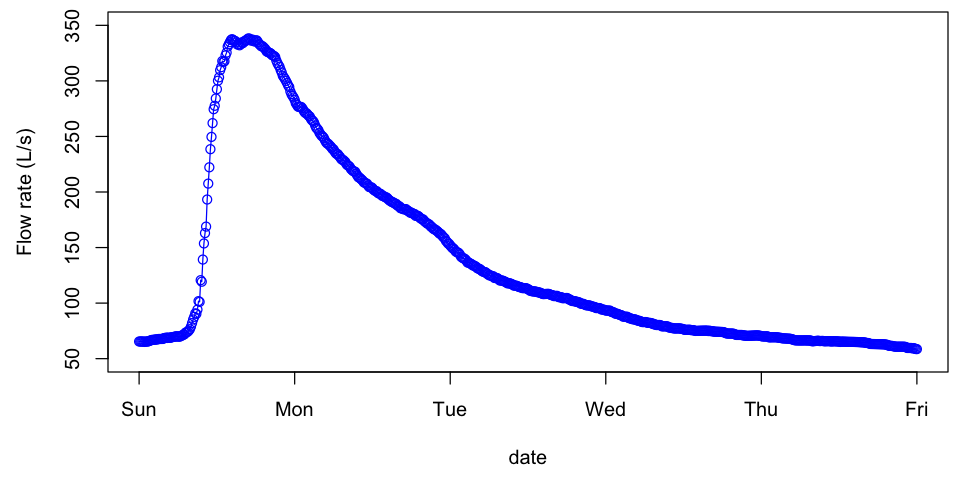

In [308]:
hydgph<-read.csv(file = "https://raw.githubusercontent.com/francoisbirgand/discharge_and_flux_calculations/master/hydgph.csv", 
                   header = TRUE)
names(hydgph)=c("date","Q","NO3")
date=as.POSIXct(hydgph$date, format = "%Y-%m-%d %H:%M:%S");Q=hydgph$Q*1000
par(mar=c(4.5,4.5,0.5,0.5))
xlimHG=as.POSIXct(c("1999-01-03 00:00:00","1999-01-08 00:00:00"));ylimHG=c(50,350)
plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "o",col="blue",xlim=xlimHG,ylim=ylimHG)
cumQ<-matrix(0,length(Q),1)
for (i in 1:(length(Q)-1)){QQ=(Q[i]+Q[i+1])/2*timeres;cumQ[i+1]=cumQ[i]+QQ}
paste("cumflow /instantaneous flow rates = ",signif(tail(cumQ,1)/1000,7)," m³",sep="")
hydgph_1h <- hydgph[-1,]
Q_1h<-hydgph_1h$Q*1000
date_1h<-hydgph_1h$date[as.POSIXlt(hydgph_1h$date)$min==0]
dim(Q_1h)<-c(6,120)
Q_1h<-apply(Q_1h,2,mean)
hydgph_1h<-cbind(as.character(date_1h),Q_1h)
cumQ1h<-cumsum(Q_1h)*3600
paste("cumflow /mean hourly flow rates = ",signif(tail(cumQ1h,1)/1000,7)," m³",sep="")

Now, if we calculate the cumulative flow volume over the entire hydrograph, using each 10-min point as instantaneous flow, we shall calculate the cumulative volume to be 58816.58 m³, as shown in the calculation above.  The calculation using the mean hourly discharge yields 58814.53 m³, or a difference of 0.03‰.  Let us admit almost nothing...! 

However, when one does the calculation from the beginning to the hydrograph peak (@ 1999-01-03 15:00:00; see code below), the flow volume calculated using hourly mean discharge overestimates volumes calculated using 10-min instantaneous flow by 1.8%.  Now things are not as negligible anymore.  In the end, as long as the discharge values drop back down to their initial level, the difference is minor at best.

In [309]:
Qrise=Q[date<=as.POSIXlt("1999-01-03 15:00:00")]
cumQrise=matrix(0,length(Qrise),1)
for (i in 1:(length(Qrise)-1)){QQ=(Qrise[i]+Qrise[i+1])/2*timeres;cumQrise[i+1]=cumQrise[i]+QQ}
paste("cumflow during the rising limb /instantaneous flow rates = ",signif(tail(cumQrise,1)/1000,6)," m³",sep="")
Qrise_1h=Q_1h[as.POSIXlt(date_1h)<=as.POSIXlt("1999-01-03 15:00:00")]
cumQrise1h<-cumsum(Qrise_1h)*3600
paste("cumflow during the rising limb /mean hourly flow rates = ",signif(tail(cumQrise1h,1)/1000,6)," m³",sep="")

[1] "cumflow during the rising limb /instantaneous flow rates = 7870.19 m³"

[1] "cumflow during the rising limb /mean hourly flow rates = 7950.96 m³"

## Mistakingly using mean discharge as instantaneous discharge
We have shown until now that the intermediate results on the flow volume calculations can be slightly different when computed using *instantaneous* vs *mean over a time interval* flow values, but negligible at the hydrograph scale, and therefore at the yearly scale as well.  

Now, it becomes interesting to see whether the differences are still negligible if, unaware of the flow data type, one computes flow volume assuming *instantaneous flow values* (using the trapeze method), rather than *mean flow values over a time interval* (the rectangle method).  For this, we used the mean hourly discharge data, and treated them as if they were instantaneous. To do that, and to compute cumulative flow using data as mean hourly values, we first took the value at 1999-01-03 01:00:00 out, otherwise the final cumulative flow values would not have been fully comparable. The figure below illustrates the difference in flow values.

For this example, we can see that the difference is still rather minor, i.e., 0.01% over the example hydrograph.  One could really argue that not knowing the data type is not problematic and that there is little to worry about. And that is a fair statement in light of what has been shown in this article. Now we still want to advocate to preferentially use *instantaneous* discharge data, rather than *interval mean* values.

[1] "cumflow during the rising limb /apparent instantaneous flow rates = 58590.5 m³"

[1] "cumflow during the rising limb /hourly mean flow rates = 58579.2 m³"

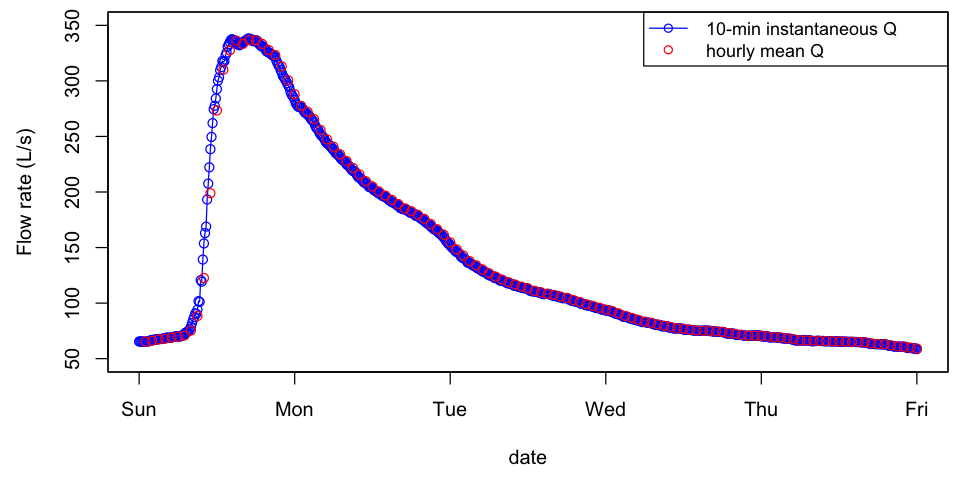

In [310]:
hydgph_1h=as.data.frame(hydgph_1h)
names(hydgph_1h)=c("date1h","Q1h")
date1h=hydgph_1h$date1h;Q1h=as.numeric(as.character(hydgph_1h$Q1h))
cumQ1h<-matrix(0,length(Q1h),1)
for (i in 1:(length(Q1h)-1)){QQ=(Q1h[i]+Q1h[i+1])/2*3600;cumQ1h[i+1]=cumQ1h[i]+QQ}
paste("cumflow during the rising limb /apparent instantaneous flow rates = ",
      signif(tail(cumQ1h,1)/1000,6)," m³",sep="")
paste("cumflow during the rising limb /hourly mean flow rates = ",
      signif(tail(cumsum(Q1h[-1])*3600,1)/1000,6)," m³",sep="")
par(mar=c(4.5,4.5,0.5,0.5))
plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "o",col="blue",xlim=xlimHG,ylim=ylimHG)
par(new=TRUE)
plot(as.POSIXct(date1h),Q1h,col="red",xlim=xlimHG,ylim=ylimHG,xaxt="n",yaxt="n",xlab="",ylab="")
legend("topright", c("10-min instantaneous Q","hourly mean Q"),
       col=c("blue","red"),lty=c(1,-1),pch=c(1,1),cex=0.9,y.intersp=2)

## Advocating for using instantaneous flow and concentration data to calculate fluxes

The beauty of *interval-mean* values is that they tend to buffer some of the noise obtained during measurements for reasons mentioned above. High frequency water quality sensors which are on their way to be widely used, tend to report *instantaneous* concentrations, and not average values. We believe it is because sensor values need to be compared to laboratory ones, and that people feel more comfortable using instantaneous/discrete values rather than average ones. 

One could be in the situation in a given watershed where concentration values would correspond to instantaneous values, while the flow rates would be *interval-means*. In this case, the data would actually be of different nature and we advocate that it would not be desirable to use them together.  We advocate that the ideal situation would be to obtain *'instantaneous'* flow values from averages of 1-sec measurements over 30 sec or 1-min from stage and velocity sensors.  This way, these *'instantaneous'* flow values would have the advantage of the *interval-average* values, in that much of the noise would be buffered by repeated measurements over short periods, and they would be comparable to isntantaneous concentrations measured by instantaneous sensors.

## Last remark on using the *cumsum()* function to calculate fluxes
In r or in Matlab, the *cumsum()* function is very handy as it calculates for each time stamp, the cumulative sum of the series of value.  In the first example below, we took a integer series from 1 to 10 and calculated the associated cumulative sum using the *cumsum()* function.

[1]  9 16 21 24 25 24 21 16  9  0

[1]   9  25  46  70  95 119 140 156 165 165

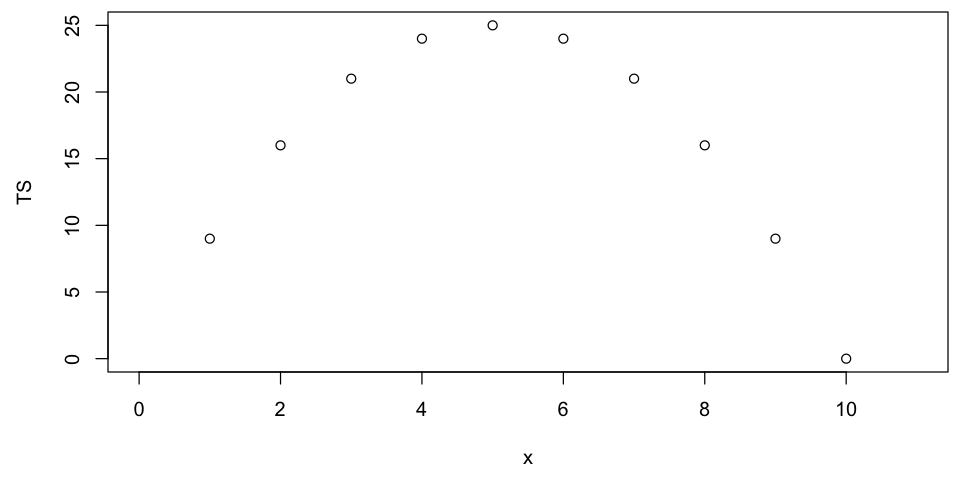

In [311]:
x<-1:10
TS<-25-(x-5)^2;TS
cumTS=cumsum(TS); cumTS
xlim=c(0,11);ylim=c(0,25)
par(mar=c(4.5,4.5,0.5,0.5))
plot(x,TS,xlim=xlim,ylim=ylim)

Now, let us imagine that *TS* (for Time Series) values actually correspond to 1-sec instantaneous flow values in *L/s*, with the first and last values corresponding to the initial and final time over which we wish to calculate the cumulative volume. The flow volume would be calculated as:

In [312]:
cumTS_inst=matrix(0,10,1)                    # 10 values, the first one being 0 to associate to initial time
for (i in 1:9){QQ=(TS[i]+TS[i+1])/2;cumTS_inst[i+1]=cumTS_inst[i]+QQ}
as.vector(cumTS_inst)

[1]   0.0  12.5  31.0  53.5  78.0 102.5 125.0 143.5 156.0 160.5

Not surprisingly, this does not correspond to *cumTS* reported above, as we have shown that trapeze and rectangle areas (what *cumsum()* really does) do not match. This is rather disappointing because the *cumsum()* function is very quick and handy, and essentially assumes that one is dealing with the equivalent of *interval-mean* values. In fact the code used *cumsum()* to calculate cumulative volumes from the *1-hr-mean* values.  

But we can actually use a trick to still use the *cumsum()* function and yield the correct cumulative flow from *instantaneous* flow values.  The trick is to calculate twice the *cumsum()* of slightly modified time series and take the average, just like in the code below.  

In [313]:
c(0,(cumsum(TS[-1])+cumsum(head(TS,-1)))/2)

[1]   0.0  12.5  31.0  53.5  78.0 102.5 125.0 143.5 156.0 160.5

The trick is thus to remove the first value out of the calculation *'cumsum(TS[-1])'* to effectively calculate the geometrical equivalence of the red rectangles below.

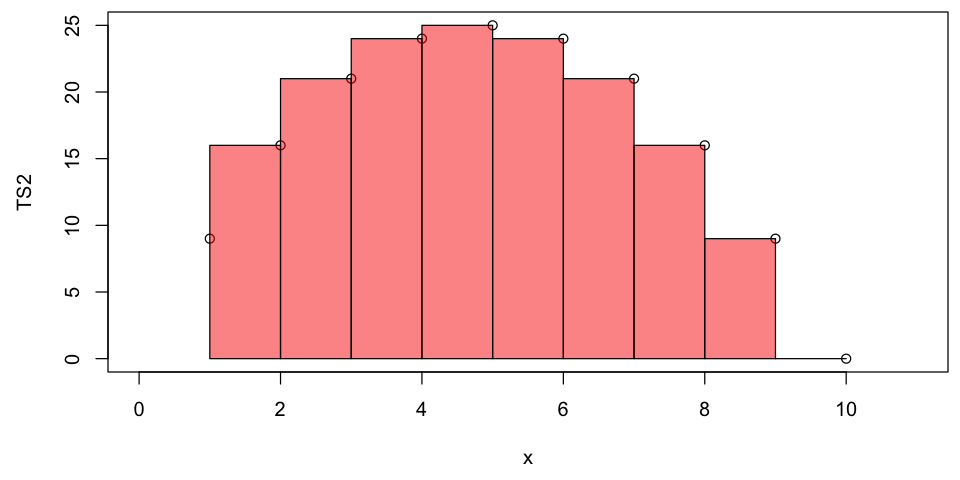

In [314]:
suprectxy=cbind(1:9,rep(0,9),2:10,TS[2:10])
infrectxy=cbind(1:9,rep(0,9),2:10,TS[1:9])
xlim=c(0,11);ylim=c(0,25)
par(mar=c(4.5,4.5,0.5,0.5))
plot(x,TS2,xlim=xlim,ylim=ylim)
mycol2 <- rgb(250, 0, 0, max = 255, alpha = 125)
for (i in 1:9){rect(suprectxy[i,1],suprectxy[i,2],suprectxy[i,3],suprectxy[i,4],col = mycol2)}

The next trick is to remove the last value from the calculation *'cumsum(head(TS,-1))'* as represented by the blue rectangles below:

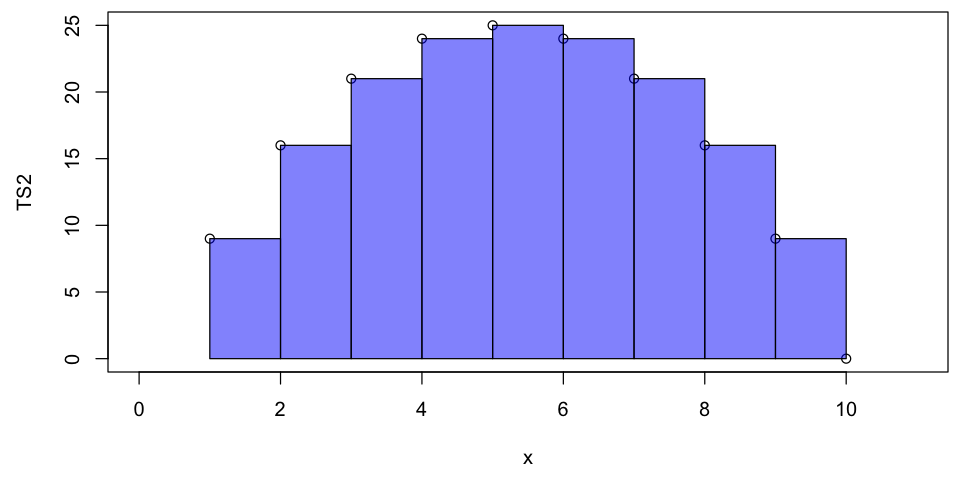

In [315]:
par(mar=c(4.5,4.5,0.5,0.5))
plot(x,TS2,xlim=xlim,ylim=ylim)
mycol1 <- rgb(0, 0, 250, max = 255, alpha = 125)
for (i in 1:9){rect(infrectxy[i,1],infrectxy[i,2],infrectxy[i,3],infrectxy[i,4],col = mycol1)}

And take the average between the two, and add a value 0 at the beginning for the first time stamp, and we are done!

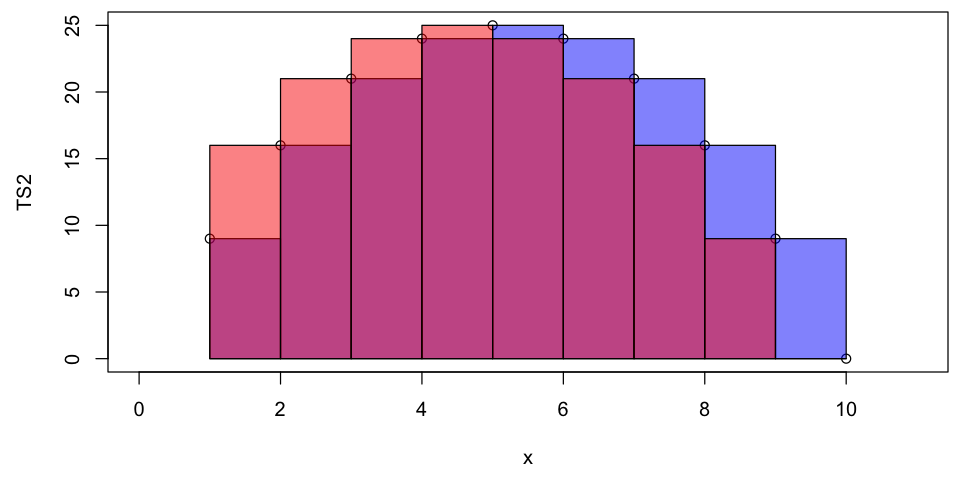

In [316]:
par(mar=c(4.5,4.5,0.5,0.5))
plot(x,TS2,xlim=xlim,ylim=ylim)
mycol1 <- rgb(0, 0, 250, max = 255, alpha = 125)
mycol2 <- rgb(250, 0, 0, max = 255, alpha = 125)
for (i in 1:9){rect(infrectxy[i,1],infrectxy[i,2],infrectxy[i,3],infrectxy[i,4],col = mycol1)}
for (i in 1:9){rect(suprectxy[i,1],suprectxy[i,2],suprectxy[i,3],suprectxy[i,4],col = mycol2)}